<a href="https://colab.research.google.com/github/mateosuster/pythonungs/blob/master/codigos/mate_financiera/2_Bonos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bonos

## Precio de mercado

*¿Cómo se calcula el precio de mercado de un bono?*

Conceptualmente, el precio de un bono es expresión del valor presente de los flujos de efectivo que promete. Esto es equivalente al **valor presente de los cupones** que dicho bono paga que más el **valor presente del face value** (o valor nominal) que se reintegrará en el vencimiento.

\

La formulación matemática del cálculo puede expresarse de la siguiente manera: 

![](https://economipedia.com/wp-content/uploads/F%C3%B3rmula-calculo-precio-de-un-bono-1-1.png)

Por lo tanto, el cómputo se puede resumir como la suma del valor presente de una anualidad (pagos de cupones) más el valor presente de un pagó único (face value). Alicaremos a continuación las funciones vista con Numpy Financial

In [ ]:
!pip install numpy_financial
import numpy_financial as npf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Definimos una función que calcule los valores presentes de estos dos flujos de fondos.

In [ ]:
def precio_bono(face, cup, r, n_cup, mat):
  """"
  * `face` =  face value
  * `cup`= monto pagado por cupón
  * `r`= tasa de interes   
  * `n_cup` = número de cupones pagados en el año
  * `mat` = años hasta la madurez
  """

  import numpy_financial as npf

  vp_an = npf.pv(fv = 0, rate = r/n_cup, nper = mat*n_cup, pmt= -cup)
  vp_face = npf.pv(fv = -face, rate = r/n_cup, nper = mat*n_cup, pmt=0)
  
  return vp_an + vp_face

Donde:


* `face` =  face value
* `cup`= monto pagado por cupón
* `r`= tasa de interes   
* `n_cup` = número de cupones pagados en el año
* `mat` = años hasta la madurez



**Ejemplo**

Se desea conocer el precio de un bono con cupon trimestral, tasa de corte del 12% anual, maduración en 15 años y valor par de $120

In [ ]:
#guardamos algunos valores en variables
face = 120
r = .12
pagos= 4
anios = 15
cupon = face*r/pagos


In [ ]:
precio_bono(face = face, r= r, mat=anios, n_cup= pagos, cup = cupon)

119.99999999999999

En este caso, el valor par concuerda con el precio del bono porque se cumplen las condiciones de valuación del bono en el mercado primario. 

En cambio, es importante prestar atención que en el mercado secundario la tasa de descuento del bono estará sujeta a los vaivenes de la economía. Por ejemplo, supongamos que queremos vender dicho bono al año siguiente y la tasa de interés aumentó al 20% debido a la percepción de incobrabilidad de los cupones. ¿Cuál sería ahora el precio?

In [ ]:
p_mdo = precio_bono(face = face, r= .2, mat=14, n_cup= pagos, cup = cupon)
p_mdo

75.12349265812256

La comparación del precio del mercado primario de un bono frente al del secundario, lo cual es lo mismo que comparar las tasa de descuento, se puede resumir de la siguiente manera:

* Si YTM = tasa de cupón, entonces el precio par = precio de mercado


* Si YTM > tasa de cupón, entonces el precio par > precio de mercado
  * Cuando el precio de mercado cotiza bajo la par se denomina *discount bond*


* Si YTM < tasa de cupón, entonces el precio par < precio de mercado
  * Cuando el precio de mercado cotiza sobre la par se denomina *premium bond*

## Yield to maturity (YTM)

Ahora bien, si poseemos como información el precio de mercado de un bono, ¿cómo podemos averiguar su tasa de descuento (*yield to maturity*)? La formula aproximada de la misma se define como sigue:


\\


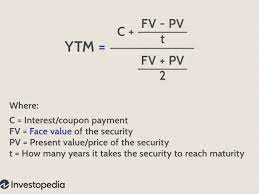


\\

De no poseer una herramienta de cálculo financiero, la estimación de la YTM se debería realizar de manera iterativa, a prueba y error con distintas tasas de descuento. Sin embargo, nosotros utilizaremos la función `irr` del paquete Numpy Finantial, a la cual debemos pasarle como parámetros el precio de mercado del bono (inversión inicial), los pagos de cupones (cash flow) y el face value (pago final de capital del bono). 

In [ ]:
ytm = npf.irr( [-p_mdo] + [cupon]*14*pagos + [face] )
ytm

0.04975319728155503

In [ ]:
[-p_mdo] + [cupon]*14*pagos + [face]

Este cálculo nos devuelve la YTM proporcional, por lo cual para obtener la tasa de descuento anual debemos multiplicarla por la cantidad de pagos

In [ ]:
ytm * pagos

0.1990127891262201

Hay que prestar que este cálculo es aproximado, por lo cual el número exacto no es el mismo, pero sí su redondeo.

## Visualizando cotizaciones 

Veamos algunas cotizaciones reales de [bonos argentinos](https://datos.gob.ar/dataset/sspm-titulos-publicos-deuda/archivo/sspm_179.1)

In [ ]:
!wget https://infra.datos.gob.ar/catalog/sspm/dataset/179/distribution/179.1/download/titulos-publicos.csv

--2021-06-18 21:21:53--  https://infra.datos.gob.ar/catalog/sspm/dataset/179/distribution/179.1/download/titulos-publicos.csv
Resolving infra.datos.gob.ar (infra.datos.gob.ar)... 186.33.215.176
Connecting to infra.datos.gob.ar (infra.datos.gob.ar)|186.33.215.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1586748 (1.5M) [text/csv]
Saving to: ‘titulos-publicos.csv.1’

titulos-publicos.cs 100%[===================>]   1.51M  1.25MB/s    in 1.2s    

2021-06-18 21:21:55 (1.25 MB/s) - ‘titulos-publicos.csv.1’ saved [1586748/1586748]



In [ ]:
import pandas as pd 

df = pd.read_csv("/content/titulos-publicos.csv")
pd.read_excel("/content/titulos-publicos.csv")

In [ ]:
df.head()

,aa19_cotizacion,aa19_yield,aa19_dur,aa19_ppv_en_anios,aa21_cotizacion,aa21_yield,aa21_dur,aa21_ppv_en_anios,a2e2_cotizacion,a2e2_yield,a2e2_dur,a2e2_ppv_en_anios,a2e3_cotizacion,a2e3_yield,a2e3_dur,a2e3_ppv_en_anios,aa26_cotizacion,aa26_yield,aa26_dur,aa26_ppv_en_anios,a2e7_cotizacion,a2e7_yield,a2e7_dur,a2e7_ppv_en_anios,a2e8_cotizacion,a2e8_yield,a2e8_dur,a2e8_ppv_en_anios,dicy_cotizacion,dicy_yield,dicy_dur,dicy_ppv_en_anios,diy0_cotizacion,diy0_yield,diy0_dur,diy0_ppv_en_anios,pary_cotizacion,pary_yield,pary_dur,pary_ppv_en_anios,...,tc23_cotizacion,tc23_yield,tc23_dur,tc23_ppv_en_anios,pr13_cotizacion,pr13_yield,pr13_dur,pr13_ppv_en_anios,tc25p_cotizacion,tc25p_yield,tc25p_dur,tc25p_ppv_en_anios,dicp_cotizacion,dicp_yield,dicp_dur,dicp_ppv_en_anios,parp_cotizacion,parp_yield,parp_dur,parp_ppv_en_anios,cuap_cotizacion,cuap_yield,cuap_dur,cuap_ppv_en_anios,af19_cotizacion,af19_yield,af19_dur,af19_ppv_en_anios,a2m2_cotizacion,a2m2_yield,a2m2_dur,a2m2_ppv_en_anios,td21_cotizacion,td21_yield,td21_dur,td21_ppv_en_anios,tvpp_cotizacion,tvpy_cotizacion,tvpa_cotizacion,tvpe_cotizacion
indice_tiempo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,700.0,0.080265,8.953592,11.9868,NaN,NaN,NaN,NaN,252.0,0.084898,12.579070,17.5272,...,NaN,NaN,NaN,NaN,149.00,0.128100,4.998972,6.0978,NaN,NaN,NaN,NaN,131.25,0.144516,7.526447,12.6360,47.50,0.118083,12.693837,19.0318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.145,50.85,50.7,57.0
2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,700.0,0.080347,8.948217,11.9840,670.0,0.085414,8.780469,12.6332,252.0,0.084958,12.573035,17.5244,...,NaN,NaN,NaN,NaN,150.35,0.126190,5.009697,6.0951,NaN,NaN,NaN,NaN,133.75,0.141912,7.599752,12.6332,46.25,0.120308,12.563981,19.0290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.340,50.30,50.4,55.6
2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,700.0,0.080371,8.944776,11.9812,673.0,0.084919,8.794155,12.6303,252.0,0.084976,12.569364,17.5217,...,NaN,NaN,NaN,NaN,150.00,0.126773,5.002877,6.0923,NaN,NaN,NaN,NaN,134.25,0.141416,7.611532,12.6303,46.00,0.120784,12.534177,19.0263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.200,49.00,50.0,54.5
2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['indice_tiempo', 'aa19_cotizacion', 'aa19_yield', 'aa19_dur',
       'aa19_ppv_en_anios', 'aa21_cotizacion', 'aa21_yield', 'aa21_dur',
       'aa21_ppv_en_anios', 'a2e2_cotizacion',
       ...
       'a2m2_dur', 'a2m2_ppv_en_anios', 'td21_cotizacion', 'td21_yield',
       'td21_dur', 'td21_ppv_en_anios', 'tvpp_cotizacion', 'tvpy_cotizacion',
       'tvpa_cotizacion', 'tvpe_cotizacion'],
      dtype='object', length=225)

In [ ]:
df.set_index(keys = "indice_tiempo", inplace = True)

In [ ]:
df_filtrado = df.loc["2017-01-01":]
df_filtrado.index

Index(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
       '2017-01-06', '2017-01-07', '2017-01-08', '2017-01-09', '2017-01-10',
       ...
       '2020-08-22', '2020-08-23', '2020-08-24', '2020-08-25', '2020-08-26',
       '2020-08-27', '2020-08-28', '2020-08-29', '2020-08-30', '2020-08-31'],
      dtype='object', name='indice_tiempo', length=1339)

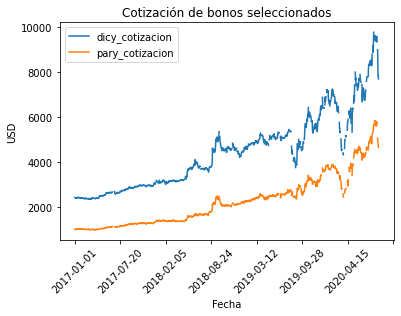

In [ ]:
df_graf = df_filtrado[["dicy_cotizacion", "pary_cotizacion"]]
df_graf.plot(title = "Cotización de bonos seleccionados", rot = 45, xlabel = "Fecha", ylabel = "USD")

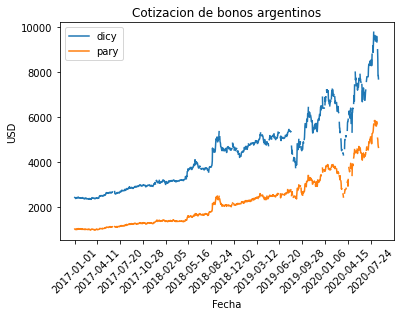

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_filtrado.index, df_filtrado.dicy_cotizacion, label= "dicy")
plt.plot(df_filtrado.index, df_filtrado.pary_cotizacion , label= "pary")
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.title("Cotizacion de bonos argentinos")
plt.legend(loc = "best")
plt.xticks(df_filtrado.index[::100],  rotation=45)
plt.show()

# Ejercicios


### Bono de Rwanda

Rwanda enfrenta una fragil situación fiscal. Los bonos que emitió hace un tiempo presentan las siguientes características: un valor a la par de $1000, una tasa de interés cupón del 12% anual, pagos de intereses anuales y actualmente le quedan 10 años para su vencimiento. La tasa de descuento que esperan ganar los inversionistas es del 10%. ¿A cuánto deben venderse estos bonos?



In [ ]:
## escriba la solución aquí



### Pepin Electric Company

Pepin Electric Company tiene pendiente una emisión de bonos a 3 años y al 10%, con un valor nominal de $1,000 cada bono. El interés se paga anualmente. Los bonos se encuentran en poder de Suresafe FIRE Insurance Company. Surefase desea vender los bonos y esta negociando con otra empresa. Estima que en las condiciones actuales del mercado los bonos deben brindar un rendimiento del 14% (rendimiento al vencimiento) ¿Qué precio por bono debe estar en posibilidad de obtener en su venta Suresafe?



In [ ]:
## escriba la solución aquí


¿Cuál seria el precio por bono en el problema si los pagos de intereses fueran semestrales? ¿Y su rendimiento corriente?

In [ ]:
## escriba la solución aquí


Considerando estos pagos semestrales, ¿cuál sería el precio de mercado si al año siguiente se vende con una YTM del 8%? ¿Cuál sería el rendimiento de capital del mismo? 

¿Cuál sería la nueva tasa de descuento del bono si en ese mismo año su precio se ubica en $1500?

### Bonos argentinos

Seleccione dos bonos argentinos del dataset cargado y presente una visualización gráfica.
